DATA UNDERSTANDING

Context:
Sebuah perusahaan bergerak di bidang rental dvd ingin mengetahui gambaran umum tentang ketertarikan/minat Customer terhadap genre film dvd yang direntalkan. Terdapat sebuah database yang menunjukan detail dari proses transaksi. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran.


Database Information

Source: https://dev.mysql.com/doc/index-other.html (Sakila)

1 The actor Table           : Tabel aktor mencantumkan informasi untuk semua aktor.
2 The address Table         : Tabel alamat berisi informasi alamat untuk pelanggan, staf, dan toko.
3 The category Table        : Tabel kategori mencantumkan kategori yang dapat ditetapkan untuk sebuah film.
4 The city Table            : Tabel kategori kategori yang dapat ditetapkan untuk sebuah film
5 The country Table         : Tabel kota berisi daftar kota.
6 The customer Table        : Tabel berisi Data Customer
7 The film Table            : Tabel film adalah daftar semua film yang berpotensi tersedia di toko. 
8 The film_actor Table      : Tabel film_actor digunakan untuk mendukung hubungan banyak-ke-banyak antara film dan aktor.
9 The film_category Table   : Tabel film_category digunakan untuk mendukung hubungan banyak ke banyak antara film dan kategori.
10 The film_text Table      : Tabel film_text berisi kolom film_id, judul dan deskripsi dari tabel film
11 The inventory Table      : Tabel inventaris berisi satu baris untuk setiap salinan film tertentu di toko tertentu.
12 The language Table       : Tabel bahasa adalah tabel pencarian yang mencantumkan kemungkinan bahasa yang dapat dimiliki film.
13 The payment Table        : Tabel pembayaran mencatat setiap pembayaran yang dilakukan oleh pelanggan,
14 The rental Table         : Tabel sewa berisi satu baris untuk setiap penyewaan setiap item.
15 The staff Table          : Tabel staf mencantumkan semua anggota staf, termasuk informasi untuk alamat email, informasi login, dan gambar.
16 The store Table          : Tabel toko mencantumkan semua toko dalam sistem.

Focus Analysis: Customer Table

DATABASE
+## Connecting To Database

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database sakila. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [838]:
# Import Modules
import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [839]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Sussis31',
    database = 'sakila' 
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan query yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil query yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel,
tapi juga akan melibatkan hubungan antar tabel.

In [840]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

Data Detail Costumer & Transaksi

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel Costumer, Payment, Rental, inventory & film. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

customer_id dari tabel customers
first_name dari tabel customers
last_name dari tabel customers
email dari tabel customers
rental_id dari tabel payment
amount dari tabel payment
inventory_id dari tabel rental
rental_date dari tabel rental
return_date dari tabel rental
film_id dari tabel inventory
title dari tabel film
rental_rate dari tabel film
rental_duration dari tabel film

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan Total_Amount yang merupakan perkalian antara amount dan rental duration
Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [841]:
# Query 1
tabel1 = sql_table (''' 
    select c.customer_id,  p.rental_id, c.first_name, c.last_name, c.email,
	f.title, ct. name as Category, 
    r.rental_date, r.return_date, p. payment_date, f. rental_duration,  p.amount, 
    round((p.amount * f.rental_duration),1) total_Amount, f. rental_rate
from customer c
left join payment p on c.customer_id = p.customer_id
left join rental r on p.rental_id = r.rental_id
left join inventory i on r.inventory_id = i.inventory_id
left join film f on i.film_id = f.film_id
left join film_category fc on i.film_id = fc.film_id
left join category ct on fc.category_id = ct.category_id;
''')
tabel1.head()

,customer_id,rental_id,first_name,last_name,email,title,Category,rental_date,return_date,payment_date,rental_duration,amount,total_Amount,rental_rate
0,1,76.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,PATIENT SISTER,Classics,2005-05-25 11:30:37,2005-06-03 12:00:37,2005-05-25 11:30:37,7.0,2.99,20.9,0.99
1,1,573.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,TALENTED HOMICIDE,Sports,2005-05-28 10:35:23,2005-06-03 06:32:23,2005-05-28 10:35:23,6.0,0.99,5.9,0.99
2,1,1185.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,MUSKETEERS WAIT,Classics,2005-06-15 00:54:12,2005-06-23 02:42:12,2005-06-15 00:54:12,7.0,5.99,41.9,4.99
3,1,1422.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,DETECTIVE VISION,Classics,2005-06-15 18:02:53,2005-06-19 15:54:53,2005-06-15 18:02:53,4.0,0.99,4.0,0.99
4,1,1476.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,FERRIS MOTHER,Comedy,2005-06-15 21:08:46,2005-06-25 02:26:46,2005-06-15 21:08:46,3.0,9.99,30.0,2.99


Data Kategori, Jumlah Film, Rental Rate & Rental Total

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat Kategori film yang tersedia mulai dari sports hingga comedy. Dari sini bisa dilihat gambaran Jumlah Film, Rental Rate & film genre apakah yang paling banyak dirental oleh Customer. Dari data ini juga bisa dilihat keadaan bagaimana gambaran jika suatu saat ingin menambah genre dvd film yang disediakan agar customer terpuaskan dan semakin banyak yang ingin di rental.

In [842]:
# Query 2

tabel2 = sql_table(
    '''
select c.name as Category, Count(f.title) as Jumlah_Film, AVG(f.rental_rate) as rata_Rental_Rate, s.total_sales as Rental_Total
from category c
left join film_category fc ON c.category_id = fc.category_id
left join film f on f.film_id = fc.film_id
left join sales_by_film_category s ON c.name = s.category
Group BY c.name
order by total_sales desc;
''')
tabel2.head()

,Category,Jumlah_Film,rata_Rental_Rate,Rental_Total
0,Sports,74,3.125135,5314.21
1,Sci-Fi,61,3.219508,4756.98
2,Animation,66,2.808182,4656.30
3,Drama,62,3.022258,4587.39
4,Comedy,58,3.162414,4383.58


DATA MANIPULATION

Data yang digunakan untuk dianalisis adalah data pada tabel1. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

Data Anomalies

In [843]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      16049 non-null  int64         
 1   rental_id        16044 non-null  float64       
 2   first_name       16049 non-null  object        
 3   last_name        16049 non-null  object        
 4   email            16049 non-null  object        
 5   title            16044 non-null  object        
 6   Category         16044 non-null  object        
 7   rental_date      16044 non-null  datetime64[ns]
 8   return_date      15861 non-null  datetime64[ns]
 9   payment_date     16049 non-null  datetime64[ns]
 10  rental_duration  16044 non-null  float64       
 11  amount           16049 non-null  object        
 12  total_Amount     16044 non-null  object        
 13  rental_rate      16044 non-null  object        
dtypes: datetime64[ns](3), float64(2), int6

Melihat Data Sekilas Dari General Info

Terlihat bahwa secara keseluruhan terdapat 16049 baris data dengan total 14 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, float dan date. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada return_date. Features tersebut kehilangan lebih dari 1% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. Kesimpulan pertama adalah bahwa terdapat missing value yang harus ditanggulangi.

Fokus berikutnya adalah perhatikan pada features berikut ini:
amount
total_Amount
rental_rate
Kedua feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari kedua feature ini adalah object. Artinya, kedua feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

In [844]:
# Check Missing Value

tabel1.isnull().sum()

customer_id          0
rental_id            5
first_name           0
last_name            0
email                0
title                5
Category             5
rental_date          5
return_date        188
payment_date         0
rental_duration      5
amount               0
total_Amount         5
rental_rate          5
dtype: int64

In [845]:
tabel1.isna().sum()/len(tabel1.index)*100

customer_id        0.000000
rental_id          0.031155
first_name         0.000000
last_name          0.000000
email              0.000000
title              0.031155
Category           0.031155
rental_date        0.031155
return_date        1.171413
payment_date       0.000000
rental_duration    0.031155
amount             0.000000
total_Amount       0.031155
rental_rate        0.031155
dtype: float64

Missing Values

Terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah return_date yang memiliki total missing value yang paling besar nilainya yaitu 188. Akan tetapi karena missing value hanya di kisaran 1% dari data yang ada, maka tabel tersebut tidak akan dihilangkan karena nantinya akan digunakan untuk kebutuhan estimasi berapa lama pemakaian dvd tersebut.

Lalu, bagaimana dengan feature lainnya? setengah feature memiliki missing value sebanyak 5. Dari segi angka, bisa diasumsikan bahwa 5 data yang hilang tersebut adalah bagian dari row yang sama yang merupakan data yang betul-betul kosong dari database-nya. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data row. Hal tersebut karena 5 dari 16049 data hanya kurang lebih 0,3% data, sehingga tidak akan mengurangi informasi secara signifikan.

Handling Anomalies

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop row/baris dari tabel return_date. Setelah drop row, barulah kemudian missing value dari setiap row-nya dihapus.

In [846]:
# Remove Missing Value 

tabel1.dropna(inplace = True)

In [847]:
# Recheck Info

tabel1.isnull().sum()

customer_id        0
rental_id          0
first_name         0
last_name          0
email              0
title              0
Category           0
rental_date        0
return_date        0
payment_date       0
rental_duration    0
amount             0
total_Amount       0
rental_rate        0
dtype: int64

Recheck Missing Value Information

Setelah melakukan proses drop missing value, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, data return_date sudah tidak terdapat lagi missing value sama sekali. Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

In [848]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15861 entries, 0 to 16048
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      15861 non-null  int64         
 1   rental_id        15861 non-null  float64       
 2   first_name       15861 non-null  object        
 3   last_name        15861 non-null  object        
 4   email            15861 non-null  object        
 5   title            15861 non-null  object        
 6   Category         15861 non-null  object        
 7   rental_date      15861 non-null  datetime64[ns]
 8   return_date      15861 non-null  datetime64[ns]
 9   payment_date     15861 non-null  datetime64[ns]
 10  rental_duration  15861 non-null  float64       
 11  amount           15861 non-null  object        
 12  total_Amount     15861 non-null  object        
 13  rental_rate      15861 non-null  object        
dtypes: datetime64[ns](3), float64(2), int6

Mengubah Tipe Data Yang Salah

Telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Kedua features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik, begitu juga dengan tipe data object. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [849]:
# Change Spesific Column To Date Time Format

tabel1['amount'] = pd.to_numeric(tabel1['amount'])
tabel1['total_Amount'] = pd.to_numeric(tabel1['total_Amount'])
tabel1['rental_rate'] = pd.to_numeric(tabel1['rental_rate'])

In [850]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15861 entries, 0 to 16048
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      15861 non-null  int64         
 1   rental_id        15861 non-null  float64       
 2   first_name       15861 non-null  object        
 3   last_name        15861 non-null  object        
 4   email            15861 non-null  object        
 5   title            15861 non-null  object        
 6   Category         15861 non-null  object        
 7   rental_date      15861 non-null  datetime64[ns]
 8   return_date      15861 non-null  datetime64[ns]
 9   payment_date     15861 non-null  datetime64[ns]
 10  rental_duration  15861 non-null  float64       
 11  amount           15861 non-null  float64       
 12  total_Amount     15861 non-null  float64       
 13  rental_rate      15861 non-null  float64       
dtypes: datetime64[ns](3), float64(5), int6

Recheck Data Information

Bagian sebelumnya, 3 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke kelima data yang sudah disebutkan sebelumnya. 3 features yang awalnya bertipe data object, yaitu amount, total_Amount dan rental_rate sudah menjadi tipe data numeric. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi.

In [851]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,customer_id,rental_id,first_name,last_name,email,title,Category,rental_date,return_date,payment_date,rental_duration,amount,total_Amount,rental_rate


Data Duplicate

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

Feature 'ProcessingDate'

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime yang dapat di Process. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. rental_date secara singkat dapat diartikan sebagai waktu atau kapan dvd tersebut disewakan, sedangkat return_date adalah waktu dikembalikannya barang tersebut.

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu peminjaman hingga pengembalian. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara return_date dan rental_date juga . Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [852]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['return_date'] - tabel1['rental_date']  
tabel1.sample(5)

,customer_id,rental_id,first_name,last_name,email,title,Category,rental_date,return_date,payment_date,rental_duration,amount,total_Amount,rental_rate,ProcessingDate
5549,204,15415.0,ROSEMARY,SCHMIDT,ROSEMARY.SCHMIDT@sakilacustomer.org,TRAP GUYS,Foreign,2005-08-22 23:48:56,2005-09-01 02:05:56,2005-08-22 23:48:56,3.0,11.99,36.0,4.99,9 days 02:17:00
14390,534,12691.0,CHRISTIAN,JUNG,CHRISTIAN.JUNG@sakilacustomer.org,SONG HEDWIG,Music,2005-08-18 20:07:46,2005-08-26 18:49:46,2005-08-18 20:07:46,3.0,5.99,18.0,0.99,7 days 22:42:00
10358,382,10327.0,VICTOR,BARKLEY,VICTOR.BARKLEY@sakilacustomer.org,BINGO TALENTED,Sci-Fi,2005-08-01 04:55:35,2005-08-07 08:17:35,2005-08-01 04:55:35,5.0,3.99,20.0,2.99,6 days 03:22:00
9835,364,1722.0,BENJAMIN,VARNEY,BENJAMIN.VARNEY@sakilacustomer.org,INSTINCT AIRPORT,Sports,2005-06-16 15:12:52,2005-06-19 13:01:52,2005-06-16 15:12:52,4.0,2.99,12.0,2.99,2 days 21:49:00
3961,146,6327.0,JAMIE,RICE,JAMIE.RICE@sakilacustomer.org,DADDY PITTSBURGH,Comedy,2005-07-11 19:07:29,2005-07-15 16:09:29,2005-07-11 19:07:29,5.0,4.99,25.0,4.99,3 days 21:02:00


Unique Value 'ProcessingDate'

setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [853]:
# Check Data Anomalies in Date Time Fomrat

tabel1['ProcessingDate'].value_counts()

9 days 03:15:00    10
6 days 22:57:00    10
4 days 18:40:00     9
2 days 19:24:00     9
5 days 00:38:00     9
                   ..
5 days 20:41:00     1
4 days 18:51:00     1
6 days 20:43:00     1
4 days 04:58:00     1
8 days 22:42:00     1
Name: ProcessingDate, Length: 5892, dtype: int64

Anomali Pada Processing Date

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, tidak terdapat data yang menyimpang.

Preview Cleaned Data

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [854]:
# Clean Data

tabel1.sample(20)

,customer_id,rental_id,first_name,last_name,email,title,Category,rental_date,return_date,payment_date,rental_duration,amount,total_Amount,rental_rate,ProcessingDate
3209,119,12603.0,SHERRY,MARSHALL,SHERRY.MARSHALL@sakilacustomer.org,MURDER ANTITRUST,Children,2005-08-18 16:56:20,2005-08-25 11:50:20,2005-08-18 16:56:20,6.0,3.99,23.9,2.99,6 days 18:54:00
7988,295,3496.0,DAISY,BATES,DAISY.BATES@sakilacustomer.org,LOSE INCH,Foreign,2005-07-05 23:59:15,2005-07-09 19:39:15,2005-07-05 23:59:15,3.0,1.99,6.0,0.99,3 days 19:40:00
5555,205,4230.0,EILEEN,CARR,EILEEN.CARR@sakilacustomer.org,BLACKOUT PRIVATE,Animation,2005-07-07 12:46:47,2005-07-15 06:52:47,2005-07-07 12:46:47,7.0,3.99,27.9,2.99,7 days 18:06:00
5148,190,430.0,YOLANDA,WEAVER,YOLANDA.WEAVER@sakilacustomer.org,HILLS NEIGHBORS,Action,2005-05-27 16:22:10,2005-06-05 13:10:10,2005-05-27 16:22:10,5.0,4.99,25.0,0.99,8 days 20:48:00
4275,157,8707.0,DARLENE,ROSE,DARLENE.ROSE@sakilacustomer.org,MALLRATS UNITED,Comedy,2005-07-29 17:21:58,2005-08-02 14:47:58,2005-07-29 17:21:58,4.0,0.99,4.0,0.99,3 days 21:26:00
3899,144,8983.0,CLARA,SHAW,CLARA.SHAW@sakilacustomer.org,HAUNTING PIANIST,Games,2005-07-30 04:31:08,2005-07-31 09:28:08,2005-07-30 04:31:08,5.0,0.99,5.0,0.99,1 days 04:57:00
1593,58,276.0,JEAN,BELL,JEAN.BELL@sakilacustomer.org,EASY GLADIATOR,Action,2005-05-26 17:16:07,2005-06-03 12:59:07,2005-05-26 17:16:07,5.0,7.99,40.0,4.99,7 days 19:43:00
1162,42,8095.0,CAROLYN,PEREZ,CAROLYN.PEREZ@sakilacustomer.org,MODERN DORADO,Documentary,2005-07-28 18:32:40,2005-08-06 23:45:40,2005-07-28 18:32:40,3.0,6.99,21.0,0.99,9 days 05:13:00
5494,202,15772.0,CARLA,GUTIERREZ,CARLA.GUTIERREZ@sakilacustomer.org,VIRTUAL SPOILERS,Family,2005-08-23 13:22:56,2005-08-26 10:35:56,2005-08-23 13:22:56,3.0,4.99,15.0,4.99,2 days 21:13:00
5059,186,11982.0,HOLLY,FOX,HOLLY.FOX@sakilacustomer.org,ANACONDA CONFESSIONS,Animation,2005-08-17 18:13:07,2005-08-18 19:06:07,2005-08-17 18:13:07,3.0,0.99,3.0,0.99,1 days 00:53:00


General Info Cleaned Data

In [855]:
# Check Some Info

dfbaru = []
for i in tabel1.columns :
    dfbaru.append([i, tabel1[i].dtype, len(tabel1),tabel1[i].isna().sum(), round((tabel1[i].isna().sum()/len(tabel1[i])) * 100,2),
                   tabel1[i].nunique(), tabel1[i].drop_duplicates().sample(2).values])
pd.DataFrame(dfbaru, columns= ['Features', 'dataType','Data Count','Missing Value', 'Missing Value Percentage','Number of unique','uniqueSample'])

,Features,dataType,Data Count,Missing Value,Missing Value Percentage,Number of unique,uniqueSample
0,customer_id,int64,15861,0,0.0,599,"[320, 204]"
1,rental_id,float64,15861,0,0.0,15861,"[6333.0, 4525.0]"
2,first_name,object,15861,0,0.0,591,"[JOANNE, COLLEEN]"
3,last_name,object,15861,0,0.0,599,"[SATTERFIELD, ROBERTS]"
4,email,object,15861,0,0.0,599,"[DENNIS.GILMAN@sakilacustomer.org, DOROTHY.TAY..."
5,title,object,15861,0,0.0,958,"[LIBERTY MAGNIFICENT, SUMMER SCARFACE]"
6,Category,object,15861,0,0.0,16,"[Sci-Fi, Music]"
7,rental_date,datetime64[ns],15861,0,0.0,15813,"[2005-07-06T09:02:09.000000000, 2005-08-22T08:..."
8,return_date,datetime64[ns],15861,0,0.0,15836,"[2005-06-29T17:17:14.000000000, 2005-06-21T21:..."
9,payment_date,datetime64[ns],15861,0,0.0,15813,"[2005-07-31T03:35:34.000000000, 2005-07-12T13:..."


Category Film berdasarkan total Rental Rate

In [856]:
# Groupping and Aggregating

tabel1[['rental_rate','Category']].groupby('Category').describe()

rental_rate                                                  
                  count      mean       std   min   25%   50%   75%   max
Category                                                                 
Action           1095.0  2.670365  1.665909  0.99  0.99  2.99  4.99  4.99
Animation        1145.0  2.755939  1.580384  0.99  0.99  2.99  4.99  4.99
Children          939.0  2.689681  1.528447  0.99  0.99  2.99  2.99  4.99
Classics          930.0  2.643763  1.589968  0.99  0.99  2.99  2.99  4.99
Comedy            932.0  3.288283  1.584389  0.99  2.49  2.99  4.99  4.99
Documentary      1043.0  2.621831  1.632980  0.99  0.99  2.99  4.99  4.99
Drama            1053.0  3.176135  1.798689  0.99  0.99  2.99  4.99  4.99
Family           1083.0  2.692678  1.582092  0.99  0.99  2.99  2.99  4.99
Foreign          1022.0  2.958689  1.650987  0.99  0.99  2.99  4.99  4.99
Games             955.0  3.130314  1.754658  0.99  0.99  2.99  4.99  4.99
Horror            834.0  3.107506  1.683364  0.99  0.99  2.99  4.99  4.99
Music             819.0  3.068144  1.713958  0.99  0.99  2.99  4.99  4.99
New               927.0  3.100032  1.634131  0.99  0.99  2.99  4.99  4.99
Sci-Fi           1093.0  2.986340  1.521514  0.99  0.99  2.99  4.99  4.99
Sports           1164.0  3.070756  1.636957  0.99  0.99  2.99  4.99  4.99
Travel            827.0  3.316481  1.582230  0.99  2.99  2.99  4.99  4.99

Terdapat sebuah feature yang bernama 'Category' pada dataset. Feature ini merupakan daftar Category Film rental dvd dari transaksi yang ada pada database. Category sendiri memiliki 16 golongan/kategori yaitu Action, Animation, Children, classics, Comedy, Documentary, Drama, Family, Foreign, Games, Horror, Music, New, Sci-Fi, Sports dan Travel.

Secara kuantitas Category 'Sports' menjadi yang paling diminati customer dibandingkan dengan Category yang lainnya. Total terdapat 1164 dvd yang direntalkan. Jika melihat dari rata-rata rental rate yakni sebesar 3.316, nilainya menjadi yang terbesar di antara Category lainnya. Artinya, Category Sports ini menjadi yang paling diminati Customer dan memiliki rata-rata sewa tertinggi.

Melihat Category 'Music' terdapat 819 perental dan memiliki rata-rata rental rate 3.068. Category Music ini menjadi yang paling sedikit peminatnya tetapi memiliki nilai rata-rata rental rate yang cukup tinggi. Artinya, Category 'Music' ini menjadi yang tidak diminati tetapi memiliki rata-rata sewa yang termasuk tinggi.

Melihat Category 'Documentary' terdapat 1043 perental dan memiliki rata-rata rental rate 2.6218. Category Documentary ini cukup banyak diminati Costumer. Tetapi jika dilihat dari rata-rata rental rate, Category 'Documentary' ini memiliki nilai rata-rata rental yang paling rendah dibandingkan dengan rating rata-rata Category lainnya. Artinya, Category 'Documentary' ini termasuk diminati oleh Customer & memiliki rata-rata sewa terendah.


Handling Outliner

Sebelum data dianalisa sebaiknya dilakukan pemeriksaan terhadap data outlier terlebih dahulu. Data outlier dibawah ini menggunakan salah satu teknik visualisasi yaitu menggunakan boxplot. Terdapat 3 kolom yang akan diperiksa dengan boxplot yaitu rental_duration, rental_rate, amount. Masing-masing kolom tersebut adalah data numerik.

C:\Users\Wirdan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Wirdan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Wirdan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0.5, 0, 'Dollar')

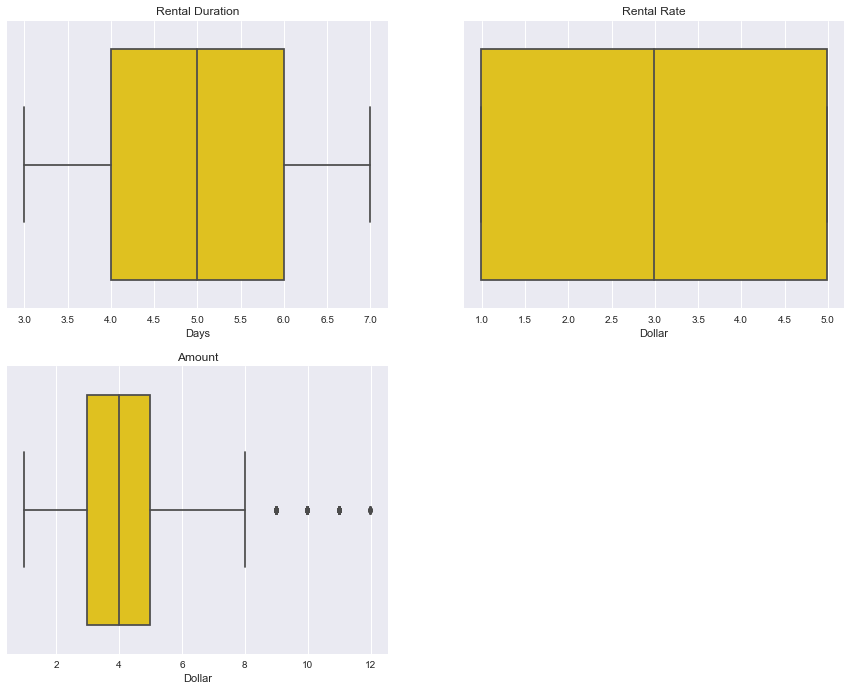

In [857]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
sns.boxplot(tabel1['rental_duration'], color='gold')
plt.title('Rental Duration')
plt.xlabel('Days')
plt.subplot(3,2,2)
sns.boxplot(tabel1['rental_rate'], color='gold')
plt.title('Rental Rate')
plt.xlabel('Dollar')
plt.subplot(3,2,3)
sns.boxplot(tabel1['amount'], color='gold')
plt.title('Amount')
plt.xlabel('Dollar')


In [862]:
Q1_amount = tabel1['amount'].describe()['25%']
Q3_amount = tabel1['amount'].describe()['75%']
IQR_amount = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['amount'] < Q1_amount - (1.5 * IQR_amount)) | (tabel1['amount']> Q3_amount + (1.5 * IQR_amount)) ].index
tabel1.loc[outlier_index]

,customer_id,rental_id,first_name,last_name,email,title,Category,rental_date,return_date,payment_date,rental_duration,amount,total_Amount,rental_rate,ProcessingDate
4,1,1476.0,MARY,SMITH,MARY.SMITH@sakilacustomer.org,FERRIS MOTHER,Comedy,2005-06-15 21:08:46,2005-06-25 02:26:46,2005-06-15 21:08:46,3.0,9.99,30.0,2.99,9 days 05:18:00
43,2,9236.0,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,TEEN APOLLO,Travel,2005-07-30 13:47:43,2005-08-08 18:52:43,2005-07-30 13:47:43,3.0,10.99,33.0,4.99,9 days 05:05:00
61,3,1546.0,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,STRANGERS GRAFFITI,Horror,2005-06-16 01:34:05,2005-06-24 04:27:05,2005-06-16 01:34:05,4.0,8.99,36.0,4.99,8 days 02:53:00
68,3,7503.0,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,CASUALTIES ENCINO,Action,2005-07-27 20:23:12,2005-08-05 18:46:12,2005-07-27 20:23:12,3.0,10.99,33.0,4.99,8 days 22:23:00
80,3,13403.0,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,RAGING AIRPLANE,Sci-Fi,2005-08-19 22:18:07,2005-08-27 19:23:07,2005-08-19 22:18:07,4.0,8.99,36.0,4.99,7 days 21:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15928,595,3789.0,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,SECRETS PARADISE,Family,2005-07-06 14:02:26,2005-07-14 18:13:26,2005-07-06 14:02:26,3.0,9.99,30.0,4.99,8 days 04:11:00
15946,595,9826.0,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,MINE TITANS,New,2005-07-31 11:51:46,2005-08-09 17:18:46,2005-07-31 11:51:46,3.0,10.99,33.0,4.99,9 days 05:27:00
15984,597,514.0,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,GOODFELLAS SALUTE,Sci-Fi,2005-05-28 03:09:28,2005-06-05 00:49:28,2005-05-28 03:09:28,4.0,8.99,36.0,4.99,7 days 21:40:00
16037,599,6800.0,AUSTIN,CINTRON,AUSTIN.CINTRON@sakilacustomer.org,SOMETHING DUCK,Drama,2005-07-12 17:03:56,2005-07-21 20:32:56,2005-07-12 17:03:56,4.0,9.99,40.0,4.99,9 days 03:29:00


Dari hasil plot diatas dapat dilihat bahwa kolom rental_duration tidak memiliki outlier, kolom rental_rate memiliki nilai minimal dan maksimal dari data sama dengan nilai quartil 1 dan quartil 3, menunjukan bahwa tidak banyak variasi di dalam data. Kolom yang memiliki nilai outlier dari plot diatas adalah kolom amount, ditunjukan pada boxplot terdapat titik-titik outlier diluar ujung box plot.

DATA VISUALIZATION & STATISTICS

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan insight.

In [863]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Top 5 Loyal Costumer

In [864]:
fig = px.bar(tabel1['first_name'].value_counts().head(),
            title = 'Loyal Customer')
fig.show()

Dari tabel Visualisasi diatas, terdapat 5 Customer dengan loyalitas tertinggi, dan yang memiliki Loyalitas paling tinggi adalah Marion.

Film Category yang Paling Diminati

C:\Users\Wirdan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



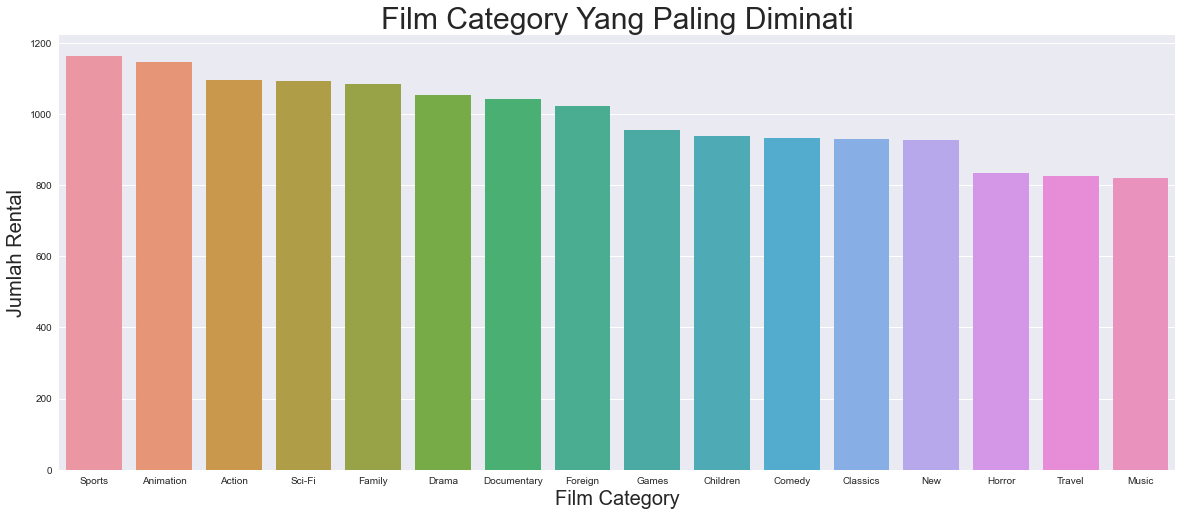

In [865]:
plt.figure(figsize=(20,8))
sns.countplot(tabel1['Category'],
            order = tabel1['Category'].value_counts().index)
plt.xlabel('Film Category', size = 20)
plt.ylabel('Jumlah Rental', size = 20)
plt.title ('Film Category Yang Paling Diminati', size = 30)
plt.show()

Dari Visualisasi diatas Category film yang paling diminati Customer adalah Category Sport.

Category Film Dengan Rata-Rata Rental Rate Tertinggi - Terendah

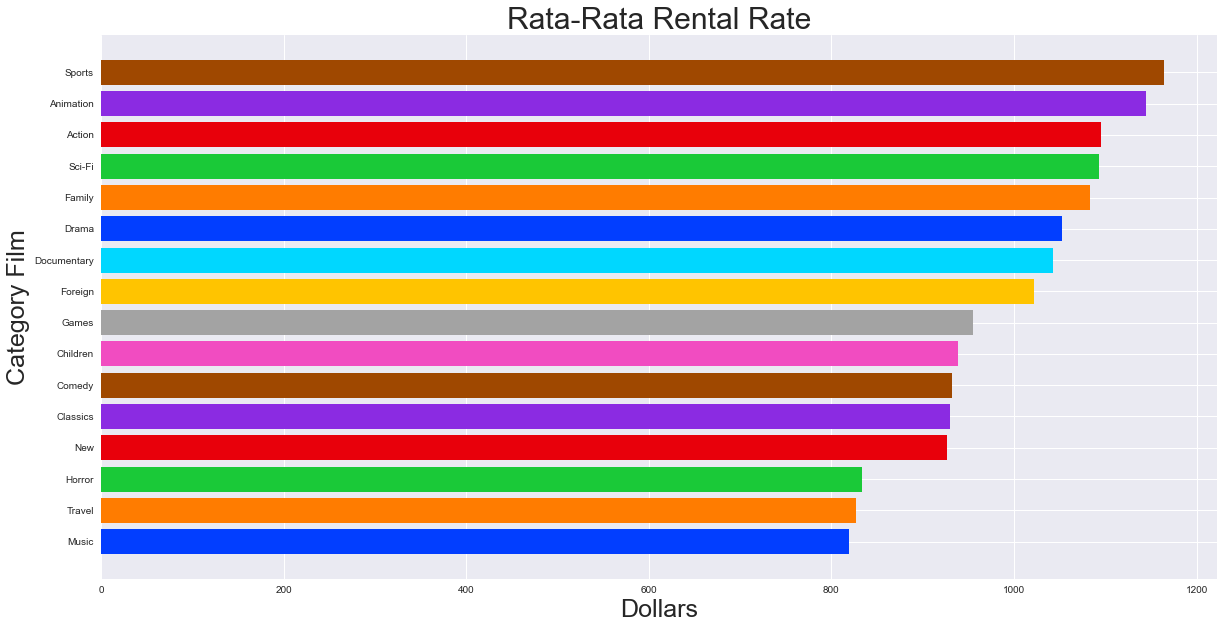

In [866]:
# Product Line Quantities

rentalRate = tabel1[['Category', 'rental_rate']].groupby(['Category']).count().sort_values('rental_rate')
x = rentalRate.index
y = rentalRate['rental_rate']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Rata-Rata Rental Rate', size = 30)
plt.xlabel('Dollars', size = 25)
plt.ylabel('Category Film', size = 25)
plt.show()

Dari Visualisasi diatas kita dapat melihat bahwa Category Film yang memiliki Rental Rate tertinggi adalah Sports dan yang memiliki Rental Rate terendah adalah Music.

Uji Statistik dan Korelasi

In [868]:
# Uji Normalitas Rental Rate

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['rental_rate'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [692]:
# Uji Perbandingan Nilai Rental Rate Antar Setiap Category  (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['Category'] == 'Sports']['rental_rate'],
    tabel1[tabel1['Category'] == 'Animation']['rental_rate'],
    tabel1[tabel1['Category'] == 'Action']['rental_rate'],
    tabel1[tabel1['Category'] == 'Sci-Fi']['rental_rate'],
    tabel1[tabel1['Category'] == 'Family']['rental_rate'],
    tabel1[tabel1['Category'] == 'Drama']['rental_rate'],
    tabel1[tabel1['Category'] == 'Documentary']['rental_rate'],
    tabel1[tabel1['Category'] == 'Foreign']['rental_rate'],
    tabel1[tabel1['Category'] == 'Games']['rental_rate'],
    tabel1[tabel1['Category'] == 'Children']['rental_rate'],
    tabel1[tabel1['Category'] == 'Comedy']['rental_rate'],
    tabel1[tabel1['Category'] == 'Classics']['rental_rate'],
    tabel1[tabel1['Category'] == 'New']['rental_rate'],
    tabel1[tabel1['Category'] == 'Horror']['rental_rate'],
    tabel1[tabel1['Category'] == 'Travel']['rental_rate'],
    tabel1[tabel1['Category'] == 'Music']['rental_rate']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan rental_rate pada Setiap film dengan kategori yang ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan rental_rate pada Setiap film dengan kategori yang ada')

Tolak H0 Karena P-Value (3.119626305618483e-56 < 5%)
Terdapat Perbedaan rental_rate pada Setiap film dengan kategori yang ada


Hasil uji kruskal Wall pada banyaknya Rental_Rate untuk Category Film menunjukan bahwa terdapat perbedaan. Ini menunjukan bahwa Rental Rate berpengaruh terhadap Category Film.

Hubungan Antar Tabel

<AxesSubplot:>

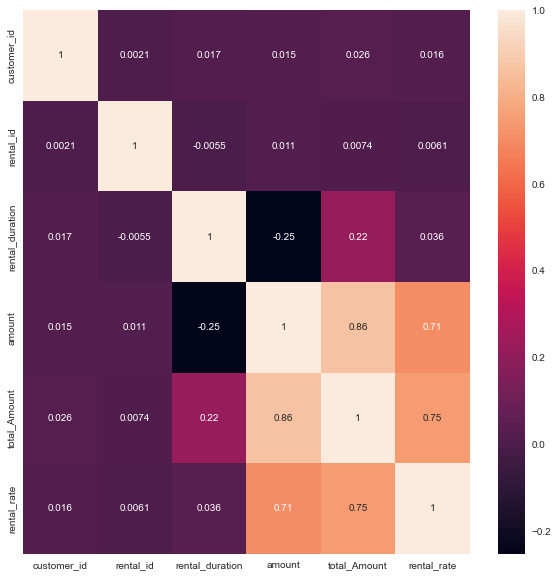

In [705]:
# Korelasi


plt.figure(figsize=(10,10))
sns.heatmap(tabel1.corr('spearman'), annot=True)